In [12]:
import torch
from classes import MambaClassifier
from transformers import AutoModel
from constants import MAMBA_HIDDEN_SIZES, MODEL_CARD
from constants import N_CLASSES, LABEL2IDX, LABELS
from PIL import Image

In [4]:
# transformer un tensor vers une image PIL
def tensor_to_pil(tensor):
    tensor = tensor.squeeze(0)
    tensor = tensor.permute(1, 2, 0)  # Change the order of dimensions
    tensor = (tensor * 255).byte().numpy()  # Convert to uint8
    return Image.fromarray(tensor)

In [6]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model with the MambaClassifier class
model = MambaClassifier(
    AutoModel.from_pretrained(MODEL_CARD, trust_remote_code=True),
    num_classes=N_CLASSES,
    hidden_dim=MAMBA_HIDDEN_SIZES.get(MODEL_CARD),
)

model.load_state_dict(
                    torch.load("model.pth"),
                )

<All keys matched successfully>

In [7]:
img = Image.open("img.jpg").convert("RGB")

processor = model.create_transform(training=False, auto_augment=None)
img_transformed = tensor_to_pil(processor(img))

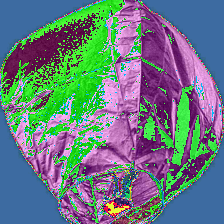

In [8]:
# display in greyscale
img_transformed.show()

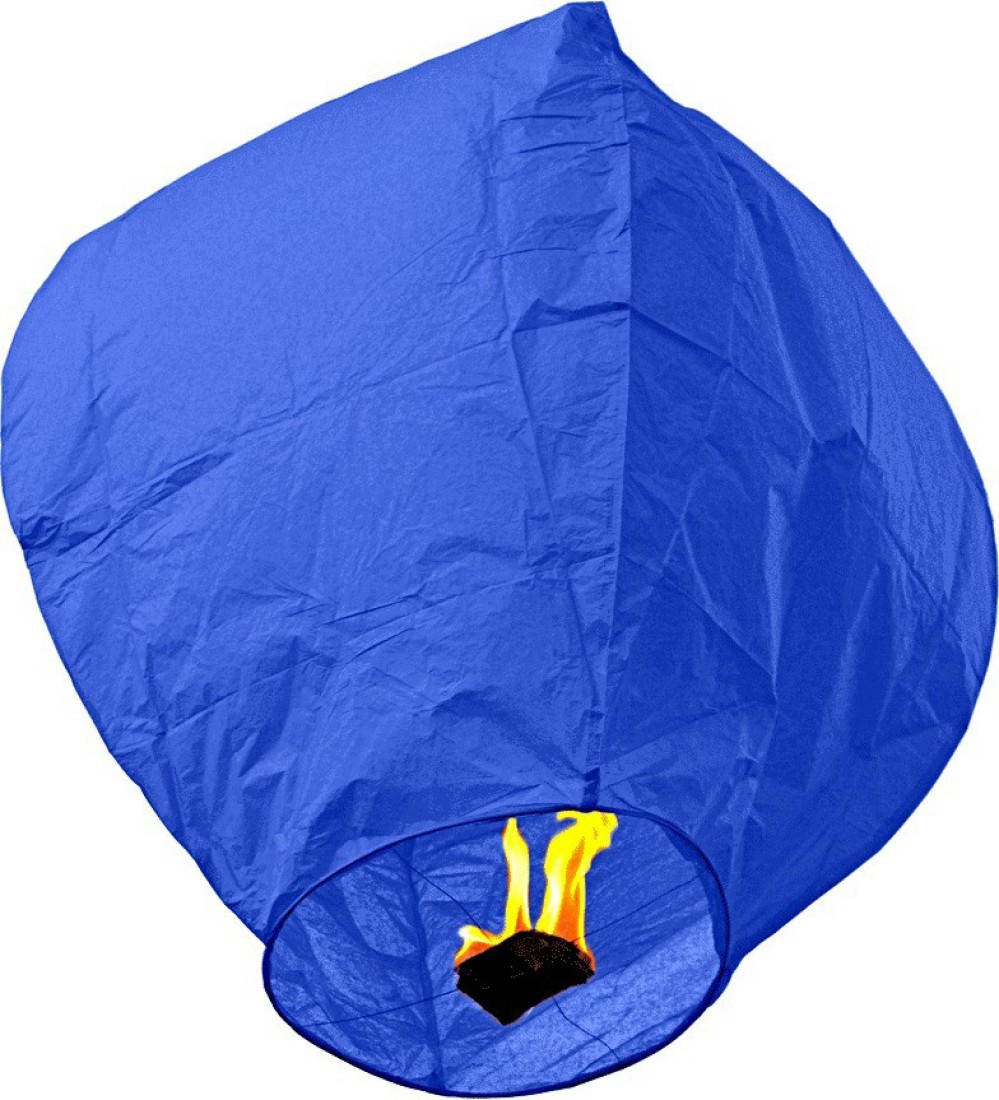

In [9]:
# display the img
img.show()

In [11]:
model.eval()

model.to(DEVICE)
# Define the configuration for the model

img_processed = processor(img).unsqueeze(0).to(DEVICE)
# Perform inference
with torch.no_grad():
    outputs = model(img_processed)
    _, predicted = torch.max(outputs, 1)
    print(f"Predicted class: {predicted.item()}")
    print(f"Predicted class name: {LABELS[predicted.item()]}")

Predicted class: 4
Predicted class name: Home Furnishing
